<a href="https://colab.research.google.com/github/rafaellagidaro/amigosecreto/blob/main/analise_lojas_alurastore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Desempenho das Lojas - Alura Store

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [ ]:
urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

lojas = {nome: pd.read_csv(url) for nome, url in urls.items()}


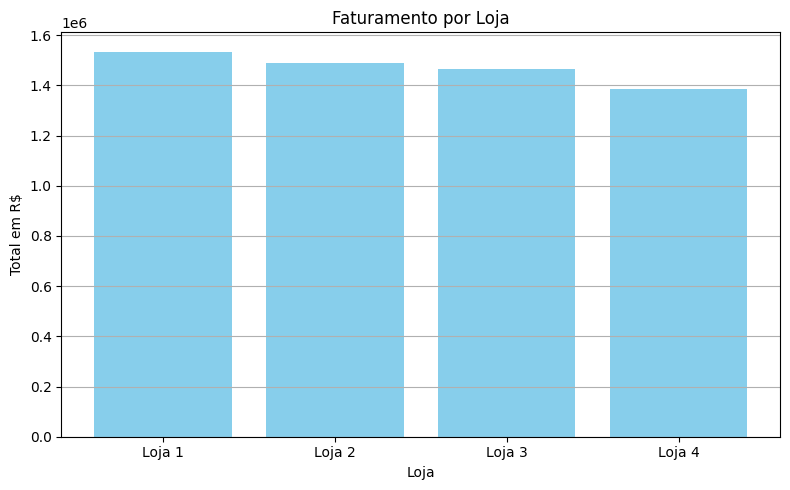

In [ ]:
faturamento = {nome: df['Preço'].sum() for nome, df in lojas.items()}
faturamento_df = pd.DataFrame.from_dict(faturamento, orient='index', columns=['Faturamento'])

# Gráfico de Faturamento
plt.figure(figsize=(8,5))
plt.bar(faturamento_df.index, faturamento_df['Faturamento'], color='skyblue')
plt.title('Faturamento por Loja')
plt.ylabel('Total em R$')
plt.xlabel('Loja')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


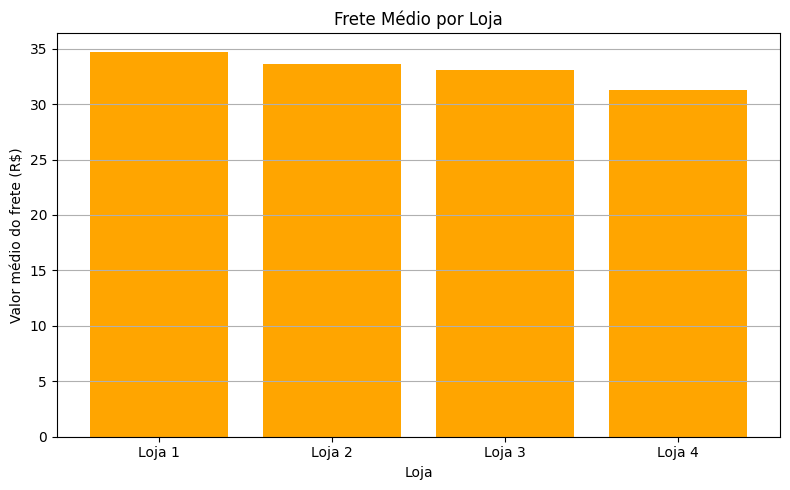

In [ ]:
frete_medio = {nome: df['Frete'].mean() for nome, df in lojas.items()}
frete_df = pd.DataFrame.from_dict(frete_medio, orient='index', columns=['Frete Médio'])

# Gráfico de Frete Médio
plt.figure(figsize=(8,5))
plt.bar(frete_df.index, frete_df['Frete Médio'], color='orange')
plt.title('Frete Médio por Loja')
plt.ylabel('Valor médio do frete (R$)')
plt.xlabel('Loja')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
mais_vendidos = {}
menos_vendidos = {}

for nome, df in lojas.items():
    produto_counts = df['Produto'].value_counts()
    mais_vendidos[nome] = produto_counts.idxmax()
    menos_vendidos[nome] = produto_counts.idxmin()

print("Produtos Mais Vendidos por Loja:")
for loja, produto in mais_vendidos.items():
    print(f"{loja}: {produto}")

print("\nProdutos Menos Vendidos por Loja:")
for loja, produto in menos_vendidos.items():
    print(f"{loja}: {produto}")


Produtos Mais Vendidos por Loja:
Loja 1: Micro-ondas
Loja 2: Iniciando em programação
Loja 3: Kit banquetas
Loja 4: Cama box

Produtos Menos Vendidos por Loja:
Loja 1: Headset
Loja 2: Jogo de tabuleiro
Loja 3: Blocos de montar
Loja 4: Guitarra


In [ ]:
avaliacoes = {nome: df['Avaliação da compra'].mean() for nome, df in lojas.items()}
avaliacoes_df = pd.DataFrame.from_dict(avaliacoes, orient='index', columns=['Avaliação Média'])


In [ ]:
analise_df = pd.concat([faturamento_df, frete_df, avaliacoes_df], axis=1)

scaler = MinMaxScaler()
analise_df['Faturamento Ruim'] = 1 - scaler.fit_transform(analise_df[['Faturamento']])
analise_df['Frete Alto'] = scaler.fit_transform(analise_df[['Frete Médio']])
analise_df['Avaliação Ruim'] = 1 - scaler.fit_transform(analise_df[['Avaliação Média']])

analise_df['Score Total Ruim'] = analise_df[['Faturamento Ruim', 'Frete Alto', 'Avaliação Ruim']].mean(axis=1)
analise_df = analise_df.sort_values('Score Total Ruim', ascending=False)

print("Ranking das lojas com pior desempenho (maior score = pior):")
print(analise_df[['Faturamento', 'Frete Médio', 'Avaliação Média', 'Score Total Ruim']])


Ranking das lojas com pior desempenho (maior score = pior):
        Faturamento  Frete Médio  Avaliação Média  Score Total Ruim
Loja 1   1534509.12    34.691805         3.976685          0.666667
Loja 4   1384497.58    31.278997         3.995759          0.577918
Loja 2   1488459.06    33.621941         4.037304          0.382446
Loja 3   1464025.03    33.074464         4.048326          0.331985


In [ ]:
pior_loja = analise_df.index[0]
print(f"\n📉 Conclusão: A loja com pior desempenho geral é a {pior_loja}. Recomenda-se vendê-la.")



📉 Conclusão: A loja com pior desempenho geral é a Loja 1. Recomenda-se vendê-la.
